# Projeto de NER usando a base UlyssesNER que contem dados da camara dos deputados


## Treinando com Spacy

In [ ]:
import json, os 


# Abrindo o arquivo train.txt para pegar a lista de entidades e criar um dicionario da lista de entidades 
# obs. (tem como retirar o id2label, e usar a função .index, caso a lista for muito grande)
entidades_juridico_train_lista = list(set([l.split(' ')[-1].replace('\n', '') for l in open('data' + os.sep + 'juridico' + os.sep + 'train.txt', 'r', encoding='utf8').readlines() if l.split(' ')[-1].replace('\n', '') != '']))
id2label = {i: tag for i, tag in enumerate(entidades_juridico_train_lista)}


In [2]:
print(id2label)
print(entidades_juridico_train_lista)

{0: 'B-DATA', 1: 'B-FUNDAMENTO', 2: 'B-ORGANIZACAO', 3: 'I-LOCAL', 4: 'I-FUNDAMENTO', 5: 'I-ORGANIZACAO', 6: 'B-PRODUTODELEI', 7: 'I-PESSOA', 8: 'B-LOCAL', 9: 'I-PRODUTODELEI', 10: 'O', 11: 'B-EVENTO', 12: 'I-DATA', 13: 'B-PESSOA', 14: 'I-EVENTO'}
['B-DATA', 'B-FUNDAMENTO', 'B-ORGANIZACAO', 'I-LOCAL', 'I-FUNDAMENTO', 'I-ORGANIZACAO', 'B-PRODUTODELEI', 'I-PESSOA', 'B-LOCAL', 'I-PRODUTODELEI', 'O', 'B-EVENTO', 'I-DATA', 'B-PESSOA', 'I-EVENTO']


In [3]:
entidades_juridico_train_lista.index('B-DATA')

0

### Carregando e convertendo os arquivos de validação, treino e teste

In [71]:
# Treinamento
juridico_train = json.load(open('data' + os.sep + 'juridico' + os.sep + 'train.json', 'r', encoding='utf8'))
print('Treino: ')
print(juridico_train[0])
print()

for i, payload in enumerate(juridico_train):
    juridico_train[i]['ner_tags'] = [entidades_juridico_train_lista.index(entidade) for entidade in payload['ner_tokens']]

# Validação
juridico_valid = json.load(open('data' + os.sep + 'juridico' + os.sep + 'dev.json', 'r', encoding='utf8'))
print('Validação: ')
print(juridico_valid[0])
print()

for i, payload in enumerate(juridico_valid):
    juridico_valid[i]['ner_tags'] = [entidades_juridico_train_lista.index(entidade) for entidade in payload['ner_tokens']]


# Teste
juridico_test = json.load(open('data' + os.sep + 'juridico' + os.sep + 'test.json', 'r', encoding='utf8'))
print('Teste: ')
print(juridico_test[0])
print()

for i, payload in enumerate(juridico_test):
    juridico_test[i]['ner_tags'] = [entidades_juridico_train_lista.index(entidade) for entidade in payload['ner_tokens']]

Treino: 
{'sentences': 'sala das sessões , em de de 2019 .', 'tokens': ['sala', 'das', 'sessões', ',', 'em', 'de', 'de', '2019', '.'], 'ner_tokens': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATA', 'O']}

Validação: 
{'sentences': 'art . 3º esta lei entra em vigor na data de sua publicação .', 'tokens': ['art', '.', '3º', 'esta', 'lei', 'entra', 'em', 'vigor', 'na', 'data', 'de', 'sua', 'publicação', '.'], 'ner_tokens': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']}

Teste: 
{'sentences': 'cremos que estes avisos , afixados em qualquer estabelecimento podem servir para a formação da consciência sanitária dos motoristas e inibir comportamentos de risco à saúde de todos .', 'tokens': ['cremos', 'que', 'estes', 'avisos', ',', 'afixados', 'em', 'qualquer', 'estabelecimento', 'podem', 'servir', 'para', 'a', 'formação', 'da', 'consciência', 'sanitária', 'dos', 'motoristas', 'e', 'inibir', 'comportamentos', 'de', 'risco', 'à', 'saúde', 'de', 'todos', '.'], 'ner_tokens': 

In [5]:
juridico_train[0]

{'sentences': 'sala das sessões , em de de 2019 .',
 'tokens': ['sala', 'das', 'sessões', ',', 'em', 'de', 'de', '2019', '.'],
 'ner_tokens': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATA', 'O'],
 'ner_tags': [10, 10, 10, 10, 10, 10, 10, 0, 10]}

In [6]:
entidades_juridico_train_lista.index('O')

10

In [7]:
def convert_to_entity_dicts(data: dict[str, list[str]]) -> tuple[list[dict], str]:
    """
    Converts a dictionary containing token and NER tag information to a list of dictionaries
    containing start, end, label, and text for each named entity.

    Args:
        data (dict[str, list[str]]): A dictionary containing 'tokens' and 'ner_tags' keys.

    Returns:
        tuple[list[dict], str]: A list of dictionaries containing start, end, label, and text for each named entity,
        and the original text formed by joining the tokens.

    Example:
        >>> data = {'tokens': ['John', 'Doe', 'is', 'a', 'doctor'], 'ner_tags': [1, 2, 0, 0, 3]}
        >>> entities, text = convert_to_entity_dicts(data)
        >>> entities
        [{'start': 0, 'end': 8, 'label': 1, 'text': 'John Doe'}, {'start': 15, 'end': 21, 'label': 3, 'text': 'doctor'}]
        >>> text
        'John Doe is a doctor'
    """
    # Extract tokens and NER tags from the input data
    tokens = data["tokens"]
    ner_tags = data["ner_tokens"]
    #ner_tags = [id2label[tag_id] for tag_id in entidades_juridico_train_lista]
    entity_dicts = []

    # Join the tokens to form the original text
    original_text = " ".join(tokens)

    i = 0
    while i < len(tokens):
        # Check if the current token is part of a named entity
        if ner_tags[i] != 0:
            label = ner_tags[i]
            # Calculate the start index of the named entity
            start_index = len(" ".join(tokens[:i])) + int(i > 0)
            start_token_idx = i
            # Find the end index of the named entity
            while i < len(tokens) and ner_tags[i] == label:
                i += 1
            end_index = len(" ".join(tokens[:i]))
            # Extract the text of the entity
            entity_text = " ".join(tokens[start_token_idx:i])
            # Add the named entity to the list of dictionaries
            entity_dicts.append(
                {
                    "start": start_index,
                    "end": end_index,
                    "label": label,
                    "text": entity_text,
                }
            )
        else:
            i += 1

    # Remove O entities from the list
    entity_dicts = [entity for entity in entity_dicts if entity["label"] != "O"]

    return entity_dicts, original_text


def merge_entities_of_same_type(text: str, entity_spans: list[dict]) -> list[dict]:
    """
    Merges B- and I- entities of the same type.

    Args:
        text (str): A string containing the text to be analyzed.
        entity_spans (list[dict]): A list of dictionaries containing start, end, label, and text for each named entity.

    Returns:
        list[dict]: A list of dictionaries containing start, end, label, and text for each named entity
                   with B- and I- entities of the same type merged and B- prefixes removed.

    Example:
        >>> text = "John Doe Smith is a doctor."
        >>> entity_spans = [
        ...     {'start': 0, 'end': 4, 'label': 'B-PERSON', 'text': 'John'},
        ...     {'start': 5, 'end': 8, 'label': 'I-PERSON', 'text': 'Doe'},
        ...     {'start': 9, 'end': 14, 'label': 'I-PERSON', 'text': 'Smith'},
        ...     {'start': 18, 'end': 24, 'label': 'B-PROFESSION', 'text': 'doctor'}
        ... ]
        >>> merge_entities_of_same_type(text, entity_spans)
        [{'start': 0, 'end': 14, 'label': 'PERSON', 'text': 'John Doe Smith'},
         {'start': 18, 'end': 24, 'label': 'PROFESSION', 'text': 'doctor'}]
    """
    merged_entity_spans = []
    i = 0
    while i < len(entity_spans):
        # If current entity starts with 'B-'
        if entity_spans[i]["label"].startswith("B-"):
            start_idx = entity_spans[i]["start"]
            end_idx = entity_spans[i]["end"]
            entity_type = entity_spans[i]["label"][2:]  # Remove 'B-'
            entity_text = entity_spans[i]["text"]
            j = i + 1

            # Keep merging consecutive I- entities of the same type
            while (
                j < len(entity_spans) and entity_spans[j]["label"] == f"I-{entity_type}"
            ):
                end_idx = entity_spans[j]["end"]
                entity_text = text[
                    start_idx:end_idx
                ]  # Extract the full merged text from original
                j += 1

            merged_entity_spans.append(
                {
                    "start": start_idx,
                    "end": end_idx,
                    "label": entity_type,
                    "text": entity_text,
                }
            )
            i = j
        # If it's not a B- entity, add it as is (but remove B- or I- prefix if present)
        else:
            label = entity_spans[i]["label"]
            if label.startswith(("B-", "I-")):
                label = label[2:]

            merged_entity_spans.append(
                {
                    "start": entity_spans[i]["start"],
                    "end": entity_spans[i]["end"],
                    "label": label,
                    "text": entity_spans[i]["text"],
                }
            )
            i += 1

    return merged_entity_spans

In [72]:
print(juridico_train[0])
ner_dict, text = convert_to_entity_dicts(juridico_train[0])
ner_dict, text

{'sentences': 'sala das sessões , em de de 2019 .', 'tokens': ['sala', 'das', 'sessões', ',', 'em', 'de', 'de', '2019', '.'], 'ner_tokens': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATA', 'O'], 'ner_tags': [10, 10, 10, 10, 10, 10, 10, 0, 10]}


([{'start': 28, 'end': 32, 'label': 'B-DATA', 'text': '2019'}],
 'sala das sessões , em de de 2019 .')

In [10]:
import json

print(json.dumps(ner_dict, indent=4))

[
    {
        "start": 28,
        "end": 32,
        "label": "B-DATA",
        "text": "2019"
    }
]


In [11]:
ner_dict = merge_entities_of_same_type(text, ner_dict)
ner_dict

[{'start': 28, 'end': 32, 'label': 'DATA', 'text': '2019'}]

In [30]:
from spacy import displacy
from helpers.misc import get_random_colors


def render_named_entities(
    text: str, entity_spans: list[dict[str, any]], colors: dict[str, str] | None = None
) -> list[dict[str, any]]:
    """
    Render named entities in the text using displaCy.

    Args:
        text (str): The text to render.
        entity_spans (list[dict[str, any]]): A list of dictionaries, each containing the start index, end index, label, and text of an entity.
        colors (Optional[dict[str, str]]): A dictionary mapping entity types to colors. If None, random colors will be used.

    Returns:
        list[dict[str, any]]: The list of entity dictionaries that was rendered.

    Example:
        >>> text = "John Doe works at OpenAI."
        >>> entity_spans = [
        ...     {"start": 0, "end": 8, "label": "PERSON", "text": "John Doe"},
        ...     {"start": 18, "end": 24, "label": "ORG", "text": "OpenAI"}
        ... ]
        >>> render_named_entities(text, entity_spans)
    """
    # If no colors are provided, generate random colors for each entity type
    if colors is None:
        entity_types = list(set([span["label"] for span in entity_spans]))
        random_colors = get_random_colors(len(entity_types))
        colors = {
            entity_type: random_colors[i] for i, entity_type in enumerate(entity_types)
        }

    # Define the options for displaCy visualization
    displacy_options = {"ents": list(colors.keys()), "colors": colors}

    # Prepare the data for displaCy rendering
    displacy_data = [{"text": text, "ents": entity_spans}]

    # Render the named entities in the text using displaCy
    displacy.render(
        displacy_data, style="ent", manual=True, jupyter=True
    )

In [68]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128

Looking in indexes: https://download.pytorch.org/whl/cu128


In [69]:
render_named_entities(text, ner_dict)

ImportError: cannot import name 'display' from 'IPython.core.display' (c:\Users\josel\Documents\UFRN\PLN\imd1107-nlp\.venv\Lib\site-packages\IPython\core\display.py)

In [32]:
def prepare_lener_data_for_training(lener_data: list) -> list[tuple[str, list[tuple[int, int, str]]]]:
    """
    Prepare the data for training by converting it to tuples and merging entities of the same type.

    Args:
        lener_data (list): The data to prepare for training.
        id2label (dict): A dictionary mapping entity IDs to labels.

    Returns:
        list[tuple[str, list[tuple[int, int, str]]]]: A list of tuples, each containing a text and a list of entity tuples.
    """
    # Initialize an empty list to store the prepared data
    prepared_data = []

    # Iterate over the data
    for data_item in lener_data:
        # Convert the data item to tuples
        entity_dicts, text = convert_to_entity_dicts(data_item)
        # Merge entities of the same type
        entity_dicts = merge_entities_of_same_type(text, entity_dicts)
        # Append the text and the entity tuples to the prepared data
        prepared_data.append((text, entity_dicts))

    return prepared_data


# Prepare the training, validation, and test data
training_data = prepare_lener_data_for_training(juridico_train)
validation_data = prepare_lener_data_for_training(juridico_valid)
test_data = prepare_lener_data_for_training(juridico_test)

In [33]:
import random

random.seed(271828)

random.shuffle(training_data)  # shuffle the training data

In [34]:
import spacy
from spacy.tokens import DocBin

# Load a new blank spaCy model for Portuguese
nlp = spacy.blank("pt")


def convert_to_spacy(data_list):
    """
    Converts a list of texts and their annotations to a spaCy DocBin object.

    Args:
        data_list (list): A list of tuples containing the text and annotations.
            Each annotation should be a dictionary with keys "start", "end", "label", and "text".

    Returns:
        DocBin: A spaCy DocBin object containing the labeled texts.
    """
    # Create a DocBin object to store the processed documents
    db = DocBin()

    # Iterate over each text and its corresponding annotations in the data list
    for text, annot in data_list:
        # Create a spaCy Doc object from the text
        doc = nlp.make_doc(text)
        ents = []
        seen_tokens = set()

        # Iterate over each annotation dictionary
        for entity in annot:
            start = entity["start"]
            end = entity["end"]
            label = entity["label"]

            # Create a span for the entity using character indexes.
            span = doc.char_span(start, end, label=label, alignment_mode="contract")

            # If the span is None, the character span does not align with token boundaries.
            if span is None:
                print(
                    f"Skipping entity [{start}, {end}, {label}] in the following text because "
                    f"the character span '{text[start:end]}' does not align with token boundaries:\n\n{text}\n"
                )
            else:
                # Check for overlapping tokens
                if any(token.i in seen_tokens for token in span):
                    continue
                else:
                    # Add the span to the list of entities
                    ents.append(span)
                    seen_tokens.update(token.i for token in span)

        # Assign the list of entities to the doc.ents attribute
        doc.ents = ents

        # Add the processed document to the DocBin object
        db.add(doc)

    # Return the DocBin object containing all the processed documents
    return db


# Example usage:
# Assuming training_data, validation_data, and test_data are defined somewhere,
# and each annotation is now a dict with keys "start", "end", "label", and "text".
db_train = convert_to_spacy(training_data)
db_valid = convert_to_spacy(validation_data)
db_test = convert_to_spacy(test_data)

In [35]:
from pathlib import Path

output_dir = Path("./outputs/spacy")  # output directory
output_dir.mkdir(parents=True, exist_ok=True)  # create the output directory

In [36]:
# Save the data to disk
db_train.to_disk("./outputs/spacy/train.spacy")
db_valid.to_disk("./outputs/spacy/valid.spacy")
db_test.to_disk("./outputs/spacy/test.spacy")

In [37]:
# If we want to load it later
from spacy.tokens import DocBin

db_train = DocBin().from_disk("./outputs/spacy/train.spacy")
db_valid = DocBin().from_disk("./outputs/spacy/valid.spacy")
db_test = DocBin().from_disk("./outputs/spacy/test.spacy")
len(db_train), len(db_valid), len(db_test)

(1760, 140, 592)

In [ ]:
# Creating the config file
! python -m spacy init config "./outputs/spacy/config.cfg" --lang pt --pipeline ner --optimize efficiency --force

⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: pt
- Pipeline: ner
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
outputs\spacy\config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
# Training

! python -m spacy train "./outputs/spacy/config.cfg" \
                        --output "./outputs/spacy" \
                        --paths.train "./outputs/spacy/train.spacy" \
                        --paths.dev "./outputs/spacy/valid.spacy" 

ℹ Saving to output directory: outputs\spacy
ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     51.70    0.00    0.00    0.00    0.00
  0     200        662.03   1606.52    8.51   17.39    5.63    0.09
  0     400       2204.37   1212.91   24.86   53.49   16.20    0.25
  0     600       4884.61   1725.90   38.57   53.09   30.28    0.39
  1     800        628.11   1385.34   51.48   64.21   42.96    0.51
  1    1000        428.23   1226.08   61.96   69.91   55.63    0.62
  2    1200        971.48   1231.78   65.47   66.91   64.08    0.65
  3    1400        833.99   1194.82   74.90

In [38]:
# Evaluation
from spacy.training.example import Example

nlp_ner = spacy.load("./outputs/spacy/model-best")
db_test = DocBin().from_disk("./outputs/spacy/test.spacy")


examples = []
for doc in db_test.get_docs(nlp_ner.vocab):
    examples.append(Example(nlp_ner.make_doc(doc.text), doc))

results_spacy = nlp_ner.evaluate(examples)
results_spacy

{'token_acc': 1.0,
 'token_p': 1.0,
 'token_r': 1.0,
 'token_f': 1.0,
 'ents_p': 0.7380191693290735,
 'ents_r': 0.648876404494382,
 'ents_f': 0.6905829596412557,
 'ents_per_type': {'PESSOA': {'p': 0.7851239669421488,
   'r': 0.7037037037037037,
   'f': 0.7421875},
  'FUNDAMENTO': {'p': 0.7181208053691275,
   'r': 0.7328767123287672,
   'f': 0.7254237288135593},
  'PRODUTODELEI': {'p': 0.5692307692307692,
   'r': 0.5873015873015873,
   'f': 0.578125},
  'ORGANIZACAO': {'p': 0.6893203883495146,
   'r': 0.5725806451612904,
   'f': 0.6255506607929515},
  'DATA': {'p': 0.8604651162790697,
   'r': 0.8809523809523809,
   'f': 0.8705882352941177},
  'LOCAL': {'p': 0.7722772277227723, 'r': 0.5, 'f': 0.6070038910505836},
  'EVENTO': {'p': 0.0, 'r': 0.0, 'f': 0.0}},
 'speed': 25558.366820773335}

### Mostrando os resultados de precisão, recall e f1 score para cada uma das entidades usando o Spacy

In [39]:
import pandas as pd

pd.DataFrame(results_spacy["ents_per_type"]).T

,p,r,f
PESSOA,0.785124,0.703704,0.742188
FUNDAMENTO,0.718121,0.732877,0.725424
PRODUTODELEI,0.569231,0.587302,0.578125
ORGANIZACAO,0.689320,0.572581,0.625551
DATA,0.860465,0.880952,0.870588
LOCAL,0.772277,0.500000,0.607004
EVENTO,0.000000,0.000000,0.000000


## Usando Transformers

In [41]:
from transformers import (
    AutoTokenizer,
    AutoModelForTokenClassification,
    AutoModelForMaskedLM,
    pipeline,
    AutoConfig,
)
from datasets import load_dataset
from pathlib import Path
import torch

model_checkpoint = "neuralmind/bert-base-portuguese-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForMaskedLM.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [52]:
juridico_train[0]['tokens']

['sala', 'das', 'sessões', ',', 'em', 'de', 'de', '2019', '.']

In [53]:
train_dataset = [" ".join(payload["tokens"]) for payload in juridico_train]
valid_dataset = [" ".join(payload["tokens"]) for payload in juridico_valid]
test_dataset = [" ".join(payload["tokens"]) for payload in juridico_test]

# merge train and valid datasets
train_dataset = train_dataset + valid_dataset

train_dataset[10]

'outra face deste processo foi a disseminação dos atendimentos automatizados que , além do custo da tarifa , impõem grande perda de tempo e constrangimento aos usuários .'

In [54]:
# create huggingface datasets from the lists of texts

from datasets import Dataset

train_dataset = Dataset.from_dict({"text": train_dataset})
test_dataset = Dataset.from_dict({"text": test_dataset})

train_dataset = train_dataset.shuffle(seed=271828)
train_dataset

Dataset({
    features: ['text'],
    num_rows: 1900
})

In [55]:
path_to_save_lm = Path("./outputs/bert_masked_lm")
path_to_save_lm.mkdir(parents=True, exist_ok=True)

In [56]:
def tokenize_function(examples):
    """
    Tokenizes the input text in the given examples using the tokenizer object.

    Args:
    - examples: A dictionary containing the input text to be tokenized.

    Returns:
    - A dictionary containing the tokenized input text.
    """
    result = tokenizer(examples["text"])
    if tokenizer.is_fast:
        result["word_ids"] = [
            result.word_ids(i) for i in range(len(result["input_ids"]))
        ]
    return result


# Tokenize the datasets. This is the step where we convert the text to numerical representations of the tokens
tokenized_train = train_dataset.map(
    tokenize_function, batched=True, remove_columns=["text"]
)
tokenized_test = test_dataset.map(
    tokenize_function, batched=True, remove_columns=["text"]
)

Map:   0%|          | 0/1900 [00:00<?, ? examples/s]

Map:   0%|          | 0/592 [00:00<?, ? examples/s]

In [57]:
tokenized_train[1]

{'input_ids': [101,
  146,
  16975,
  1772,
  9835,
  154,
  131,
  1328,
  119,
  100,
  146,
  1328,
  119,
  100,
  180,
  2241,
  100,
  1193,
  119,
  17909,
  22338,
  117,
  125,
  2336,
  125,
  1512,
  125,
  5232,
  1379,
  9999,
  171,
  18043,
  148,
  310,
  1379,
  1425,
  123,
  8773,
  159,
  5103,
  1859,
  171,
  1457,
  204,
  100,
  117,
  12963,
  118,
  176,
  146,
  20737,
  6257,
  2232,
  171,
  4319,
  10764,
  173,
  204,
  100,
  131,
  107,
  204,
  100,
  2810,
  12119,
  251,
  123,
  19231,
  171,
  6330,
  625,
  20075,
  6944,
  2738,
  12507,
  125,
  123,
  4857,
  10907,
  22282,
  2113,
  4654,
  5245,
  117,
  2557,
  291,
  173,
  1028,
  11055,
  179,
  6554,
  8814,
  146,
  347,
  1700,
  119,
  22354,
  102],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [59]:
def group_texts(examples):
    """
    This function groups together a set of texts as contiguous text of fixed length (chunk_size). It's useful for training masked language models.

    Args:
    - examples: A dictionary containing the examples to group. Each key corresponds to a feature, and each value is a list of lists of tokens.

    Returns:
    - A dictionary containing the grouped examples. Each key corresponds to a feature, and each value is a list of lists of tokens.
    """
    # Concatenate all texts
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    # Compute length of concatenated texts
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the last chunk if it's smaller than chunk_size
    total_length = (total_length // chunk_size) * chunk_size
    # Split by chunks of max_len
    result = {
        k: [t[i : i + chunk_size] for i in range(0, total_length, chunk_size)]
        for k, t in concatenated_examples.items()
    }
    # Create a new labels column
    result["labels"] = result["input_ids"].copy()
    return result


chunk_size = 512

tokenized_train = tokenized_train.map(
    group_texts,
    batched=True,
)

tokenized_test = tokenized_test.map(
    group_texts,
    batched=True,
)

Map:   0%|          | 0/1900 [00:00<?, ? examples/s]

Map:   0%|          | 0/592 [00:00<?, ? examples/s]

In [60]:
for i in range(30):
    print(
        f'The number of tokens in the {i}th text is {len(tokenized_train[i]["input_ids"])}'
    )

The number of tokens in the 0th text is 512
The number of tokens in the 1th text is 512
The number of tokens in the 2th text is 512
The number of tokens in the 3th text is 512
The number of tokens in the 4th text is 512
The number of tokens in the 5th text is 512
The number of tokens in the 6th text is 512
The number of tokens in the 7th text is 512
The number of tokens in the 8th text is 512
The number of tokens in the 9th text is 512
The number of tokens in the 10th text is 512
The number of tokens in the 11th text is 512
The number of tokens in the 12th text is 512
The number of tokens in the 13th text is 512
The number of tokens in the 14th text is 512
The number of tokens in the 15th text is 512
The number of tokens in the 16th text is 512
The number of tokens in the 17th text is 512
The number of tokens in the 18th text is 512
The number of tokens in the 19th text is 512
The number of tokens in the 20th text is 512
The number of tokens in the 21th text is 512
The number of tokens

In [64]:
for i in range(5):
    print(tokenizer.decode(tokenized_train[i]["input_ids"]))

[CLS] diversas comissões permanentes e temporárias, tanto da câmara como do senado federal, examinaram as conseqüências da política indigenista nacional e constataram graves conflitos federativos que contrapõem estados e municípios à união, colocando os primeiros em risco de profundas intervenções em sua autonomia, quando não de pura e simples extinção. [SEP] [CLS] o congresso nacional decreta : art. [UNK] o art. [UNK] da lei [UNK] 10. 826, de 22 de dezembro de 2003 – estatuto do desarmamento – passa a vigorar acrescido do seguinte § [UNK], transformando - se o parágrafo único do artigo mencionado em § [UNK] : " § [UNK] será dispensada a exigência do registro quando houver impossibilidade absoluta de a arma disparar porque danificada, antiga ou em outras circunstâncias que impeçam o seu uso. ” [SEP] [CLS] com este objetivo, estamos propondo que as casas de espetáculos, shopping centers, cinemas, parques temáticos e outros estabelecimentos sejam obrigados a disponibilizarem em suas inst

In [65]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm_probability=0.15
)

In [66]:
from transformers import TrainingArguments

# Define the batch size for training
training_batch_size = 24

# Extract the model name from the model checkpoint
model_name = model_checkpoint.split("/")[-1]

# Define the training arguments
training_arguments = TrainingArguments(
    # Define the output directory for the trained model
    output_dir=path_to_save_lm / f"{model_name}-finetuned-lener",
    # Overwrite the output directory if it already exists
    overwrite_output_dir=True,
    # Evaluate the model after every epoch
    eval_strategy="epoch",
    # Set the learning rate
    learning_rate=3e-5,
    # Set the weight decay
    weight_decay=0.01,
    # Set the batch size for training
    per_device_train_batch_size=training_batch_size,
    # Set the batch size for evaluation
    per_device_eval_batch_size=training_batch_size,
    # Use mixed precision training
    bf16=True,
    # Log the training loss after every 5 steps
    logging_steps=5,
    # Log strategy
    logging_strategy="steps",
    # Train the model for 20 epochs
    num_train_epochs=20,
    # Save only the best model
    save_total_limit=1,
    # Save the model after every epoch
    save_strategy="epoch",
    # Load the best model at the end of training
    load_best_model_at_end=True,
    # Use the evaluation loss to determine the best model
    metric_for_best_model="eval_loss",
    # Lower evaluation loss is better
    greater_is_better=False,
    # Accumulate gradients for 1 steps before performing an update
    gradient_accumulation_steps=1,
    # Set the random seed for reproducibility
    seed=271828,
)

In [67]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_arguments,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    data_collator=data_collator,
    processing_class=tokenizer,
)

In [70]:


trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: joseluan (tomazfil-team) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,5.885800,1.827268
2,1.668900,1.454275
3,1.453600,1.355761
4,1.351600,1.378014
5,1.288400,1.243117
6,1.279300,1.177490
7,1.212600,1.133929
8,1.192600,1.170697
9,1.189200,1.153129
10,1.175600,1.084977


There were missing keys in the checkpoint model loaded: ['cls.predictions.decoder.weight', 'cls.predictions.decoder.bias'].


TrainOutput(global_step=160, training_loss=1.3678205877542495, metrics={'train_runtime': 2560.3279, 'train_samples_per_second': 1.5, 'train_steps_per_second': 0.062, 'total_flos': 1010697893314560.0, 'train_loss': 1.3678205877542495, 'epoch': 20.0})

In [73]:
# Save the trained model
trainer.save_model(path_to_save_lm / f"{model_name}-finetuned-juridico")
tokenizer.save_pretrained(path_to_save_lm / f"{model_name}-finetuned-juridico")

('outputs\\bert_masked_lm\\bert-base-portuguese-cased-finetuned-juridico\\tokenizer_config.json',
 'outputs\\bert_masked_lm\\bert-base-portuguese-cased-finetuned-juridico\\special_tokens_map.json',
 'outputs\\bert_masked_lm\\bert-base-portuguese-cased-finetuned-juridico\\vocab.txt',
 'outputs\\bert_masked_lm\\bert-base-portuguese-cased-finetuned-juridico\\added_tokens.json',
 'outputs\\bert_masked_lm\\bert-base-portuguese-cased-finetuned-juridico\\tokenizer.json')

In [ ]:
from transformers import (
    AutoTokenizer,
    AutoModelForTokenClassification,
    AutoModelForMaskedLM,
    pipeline,
    AutoConfig,
)
from datasets import load_dataset
from pathlib import Path
import torch

In [74]:
path_to_save_ner = Path("./outputs/bert_juridico")
path_to_save_ner.mkdir(parents=True, exist_ok=True)

In [75]:
# Clean GPU memory
import torch
import gc

model = None
trainer = None
tokenizer = None
gc.collect()
torch.cuda.empty_cache()

In [76]:
from transformers import AutoTokenizer

model_checkpoint = Path(
    "./outputs/bert_masked_lm/bert-base-portuguese-cased-finetuned-juridico"
)

# Load the tokenizer from the checkpoint
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
# Create a label2id mapping by reversing the id2label mapping
label2id_mapping = {v: k for k, v in id2label.items()}
# Load the model from the checkpoint
model = AutoModelForTokenClassification.from_pretrained(
    model_checkpoint,
    num_labels=len(id2label),
    id2label=id2label,
    label2id=label2id_mapping,
)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at outputs\bert_masked_lm\bert-base-portuguese-cased-finetuned-juridico and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [87]:
label_all_tokens = True


def tokenize_and_align_labels(examples: dict[str, list[str]]) -> dict[str, list[str]]:
    """
    Tokenize the input words and align the labels with the tokens.

    Args:
        examples (dict[str, list[str]]): A dictionary containing the input words and the corresponding labels.

    Returns:
        dict[str, list[str]]: A dictionary containing the tokenized input words and the aligned labels.
    """
    # Tokenize the input words
    tokenized_inputs = tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True, max_length=512
    )

    # Initialize an empty list to store the aligned labels
    aligned_labels = []

    # Iterate over the labels
    for i, label in enumerate(examples["ner_tags"]):
        # Get the word IDs for the current batch
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []

        # Iterate over the word IDs
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx

        # Append the label IDs to the aligned labels
        aligned_labels.append(label_ids)

    # Add the aligned labels to the tokenized inputs
    tokenized_inputs["labels"] = aligned_labels

    return tokenized_inputs

In [86]:
from datasets import Dataset

train_dataset = Dataset.from_dict({"text": train_dataset})
test_dataset = Dataset.from_dict({"text": test_dataset})


tokenized_train = Dataset.from_list(juridico_train).map(tokenize_and_align_labels, batched=True)
tokenized_valid = Dataset.from_list(juridico_valid).map(tokenize_and_align_labels, batched=True)
tokenized_test = Dataset.from_list(juridico_test).map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/1760 [00:00<?, ? examples/s]

Map:   0%|          | 0/140 [00:00<?, ? examples/s]

Map:   0%|          | 0/592 [00:00<?, ? examples/s]

In [83]:
juridico_train[0]

{'sentences': 'sala das sessões , em de de 2019 .',
 'tokens': ['sala', 'das', 'sessões', ',', 'em', 'de', 'de', '2019', '.'],
 'ner_tokens': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DATA', 'O'],
 'ner_tags': [10, 10, 10, 10, 10, 10, 10, 0, 10]}

In [88]:
import evaluate
import numpy as np

metric = evaluate.load("seqeval")


def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [id2label[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [id2label[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
        "eval_f1": results["overall_f1"],
    }

In [89]:
from transformers import DataCollatorForTokenClassification, TrainingArguments, Trainer

# Initialize a data collator for token classification
token_classification_collator = DataCollatorForTokenClassification(tokenizer)

# Extract the model name from the model checkpoint
model_name = str(model_checkpoint).split("/")[-1]

# Define the training arguments
training_arguments = TrainingArguments(
    # Define the output directory for the trained model
    output_dir=path_to_save_ner / f"{model_name}-lener",
    # Overwrite the output directory if it already exists
    overwrite_output_dir=True,
    # Set the learning rate
    learning_rate=2e-5,
    # Set the batch size for training
    per_device_train_batch_size=8,
    # Set the batch size for evaluation
    per_device_eval_batch_size=4,
    # Accumulate gradients for 1 step before performing an update
    gradient_accumulation_steps=1,
    # Train the model for 4 epochs
    num_train_epochs=4,
    # Set the weight decay
    weight_decay=0.01,
    # Save only the best model
    save_total_limit=1,
    # Log the training loss after every 5 steps
    logging_steps=5,
    # Log strategy
    logging_strategy="steps",
    # Evaluate the model after every 1 epoch
    eval_steps=1,
    # Save the model after every 1 epoch
    save_steps=1,
    # Evaluate the model after every epoch
    eval_strategy="epoch",
    # Save the model after every epoch
    save_strategy="epoch",
    # Load the best model at the end of training
    load_best_model_at_end=True,
    # Use the evaluation F1 score to determine the best model
    metric_for_best_model="eval_f1",
    # Higher evaluation F1 score is better
    greater_is_better=True,
    # Perform training
    do_train=True,
    # Perform evaluation
    do_eval=True,
    # Perform prediction
    do_predict=True,
    # Use mixed precision training
    bf16=True,
    # Do not push the model to the Hugging Face Model Hub
    push_to_hub=False,
    # Set the random seed for reproducibility
    seed=271828,
)

In [90]:
# Initialize the Trainer
trainer = Trainer(
    # The model to train
    model,
    # The training arguments
    training_arguments,
    # The training dataset
    train_dataset=tokenized_train,
    # The evaluation dataset
    eval_dataset=tokenized_valid,
    # The data collator
    data_collator=token_classification_collator,
    # The tokenizer
    processing_class=tokenizer,
    # The function to compute the metrics
    compute_metrics=compute_metrics,
)

In [91]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1,Precision,Recall,Accuracy
1,0.117800,0.155582,0.646288,0.666667,0.627119,0.959745
2,0.046600,0.095303,0.788913,0.793991,0.783898,0.976452
3,0.058400,0.093585,0.821577,0.804878,0.838983,0.975975
4,0.018400,0.093112,0.810021,0.798354,0.822034,0.976929


c:\Users\josel\Documents\UFRN\PLN\imd1107-nlp\.venv\Lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\josel\Documents\UFRN\PLN\imd1107-nlp\.venv\Lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\josel\Documents\UFRN\PLN\imd1107-nlp\.venv\Lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\josel\Docu

TrainOutput(global_step=880, training_loss=0.128488136802546, metrics={'train_runtime': 118.5671, 'train_samples_per_second': 59.376, 'train_steps_per_second': 7.422, 'total_flos': 424158979235040.0, 'train_loss': 0.128488136802546, 'epoch': 4.0})

In [92]:
trainer.evaluate(tokenized_test)

c:\Users\josel\Documents\UFRN\PLN\imd1107-nlp\.venv\Lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_f1': 0.7751677852348994,
 'eval_loss': 0.08809998631477356,
 'eval_precision': 0.7693588676103247,
 'eval_recall': 0.7810650887573964,
 'eval_accuracy': 0.9776683954940372,
 'eval_runtime': 3.0452,
 'eval_samples_per_second': 194.402,
 'eval_steps_per_second': 48.601,
 'epoch': 4.0}

In [93]:
# Save the trained model
trainer.save_model(path_to_save_ner / f"{model_name}-juridico")
tokenizer.save_pretrained(path_to_save_ner / f"{model_name}-juridico")

('outputs\\bert_juridico\\outputs\\bert_masked_lm\\bert-base-portuguese-cased-finetuned-juridico-juridico\\tokenizer_config.json',
 'outputs\\bert_juridico\\outputs\\bert_masked_lm\\bert-base-portuguese-cased-finetuned-juridico-juridico\\special_tokens_map.json',
 'outputs\\bert_juridico\\outputs\\bert_masked_lm\\bert-base-portuguese-cased-finetuned-juridico-juridico\\vocab.txt',
 'outputs\\bert_juridico\\outputs\\bert_masked_lm\\bert-base-portuguese-cased-finetuned-juridico-juridico\\added_tokens.json',
 'outputs\\bert_juridico\\outputs\\bert_masked_lm\\bert-base-portuguese-cased-finetuned-juridico-juridico\\tokenizer.json')

In [94]:
predictions, labels, _ = trainer.predict(tokenized_test)

predictions = np.argmax(predictions, axis=2)

# Remove ignored index (special tokens)
true_predictions = [
    [id2label[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [id2label[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

results_huggingface = metric.compute(
    predictions=true_predictions, references=true_labels
)
results_huggingface

{'DATA': {'precision': 0.851063829787234,
  'recall': 0.9302325581395349,
  'f1': 0.888888888888889,
  'number': 86},
 'EVENTO': {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'number': 4},
 'FUNDAMENTO': {'precision': 0.8092485549132948,
  'recall': 0.8,
  'f1': 0.8045977011494254,
  'number': 175},
 'LOCAL': {'precision': 0.775438596491228,
  'recall': 0.6717325227963525,
  'f1': 0.7198697068403908,
  'number': 329},
 'ORGANIZACAO': {'precision': 0.7428571428571429,
  'recall': 0.861878453038674,
  'f1': 0.7979539641943735,
  'number': 181},
 'PESSOA': {'precision': 0.8233532934131736,
  'recall': 0.8675078864353313,
  'f1': 0.8448540706605223,
  'number': 317},
 'PRODUTODELEI': {'precision': 0.49523809523809526,
  'recall': 0.5714285714285714,
  'f1': 0.5306122448979591,
  'number': 91},
 'overall_precision': 0.7693588676103247,
 'overall_recall': 0.7810650887573964,
 'overall_f1': 0.7751677852348994,
 'overall_accuracy': 0.9776683954940372}

## Comparando Spacy vs Transformers

In [106]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [96]:
results_spacy["ents_per_type"]

{'PESSOA': {'p': 0.7851239669421488, 'r': 0.7037037037037037, 'f': 0.7421875},
 'FUNDAMENTO': {'p': 0.7181208053691275,
  'r': 0.7328767123287672,
  'f': 0.7254237288135593},
 'PRODUTODELEI': {'p': 0.5692307692307692,
  'r': 0.5873015873015873,
  'f': 0.578125},
 'ORGANIZACAO': {'p': 0.6893203883495146,
  'r': 0.5725806451612904,
  'f': 0.6255506607929515},
 'DATA': {'p': 0.8604651162790697,
  'r': 0.8809523809523809,
  'f': 0.8705882352941177},
 'LOCAL': {'p': 0.7722772277227723, 'r': 0.5, 'f': 0.6070038910505836},
 'EVENTO': {'p': 0.0, 'r': 0.0, 'f': 0.0}}

In [ ]:
import pandas as pd
import numpy
# Padronizar o formato (entidade, modelo, métrica, valor)
rows = []

# spaCy
for ent, metrics in results_spacy["ents_per_type"].items():
    rows.append({'entity': ent, 'model': 'spaCy', 'precision': metrics['p'], 'recall': metrics['r'], 'f1': metrics['f']})

# transformers
for ent, metrics in results_huggingface.items():
    if type(metrics) != numpy.float64 and type(metrics) != float:
        rows.append({'entity': ent, 'model': 'transformers',
                    'precision': metrics.get('precision', 0),
                    'recall': metrics.get('recall', 0),
                    'f1': metrics.get('f1', 0)})

df = pd.DataFrame(rows)

In [122]:
df

,entity,model,precision,recall,f1
0,PESSOA,spaCy,0.785124,0.703704,0.742188
1,FUNDAMENTO,spaCy,0.718121,0.732877,0.725424
2,PRODUTODELEI,spaCy,0.569231,0.587302,0.578125
3,ORGANIZACAO,spaCy,0.689320,0.572581,0.625551
4,DATA,spaCy,0.860465,0.880952,0.870588
5,LOCAL,spaCy,0.772277,0.500000,0.607004
6,EVENTO,spaCy,0.000000,0.000000,0.000000
7,DATA,transformers,0.851064,0.930233,0.888889
8,EVENTO,transformers,0.000000,0.000000,0.000000
9,FUNDAMENTO,transformers,0.809249,0.800000,0.804598


#### Tempo de execução

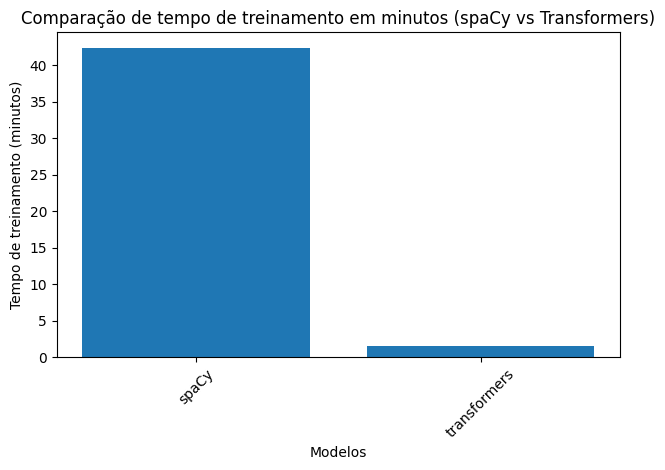

In [143]:
import matplotlib.pyplot as plt

# Frequência simulada de entidades
frequencias = {
    'spaCy': 42.4, 'transformers': 1.58
}

# Plotando
plt.bar(frequencias.keys(), frequencias.values())
plt.xticks(rotation=45)
plt.title("Comparação de tempo de treinamento em minutos (spaCy vs Transformers)")
plt.xlabel("Modelos")
plt.ylabel("Tempo de treinamento (minutos)")
plt.tight_layout()
plt.show()

C:\Users\josel\AppData\Local\Temp\ipykernel_8088\2678852552.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='entity', y='recall', hue='model', palette='Set2', ci=None)


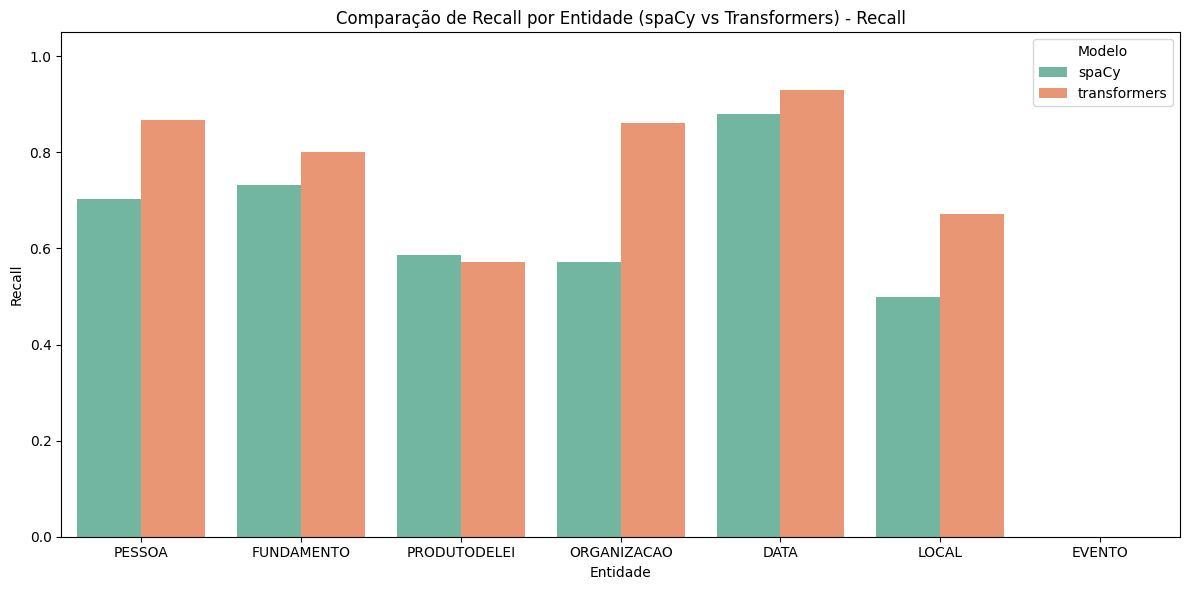

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='entity', y='recall', hue='model', palette='Set2', ci=None)

plt.title("Comparação de Recall por Entidade (spaCy vs Transformers) - Recall")
plt.ylabel("Recall")
plt.xlabel("Entidade")
plt.ylim(0, 1.05)
plt.legend(title="Modelo")
plt.tight_layout()
plt.show()

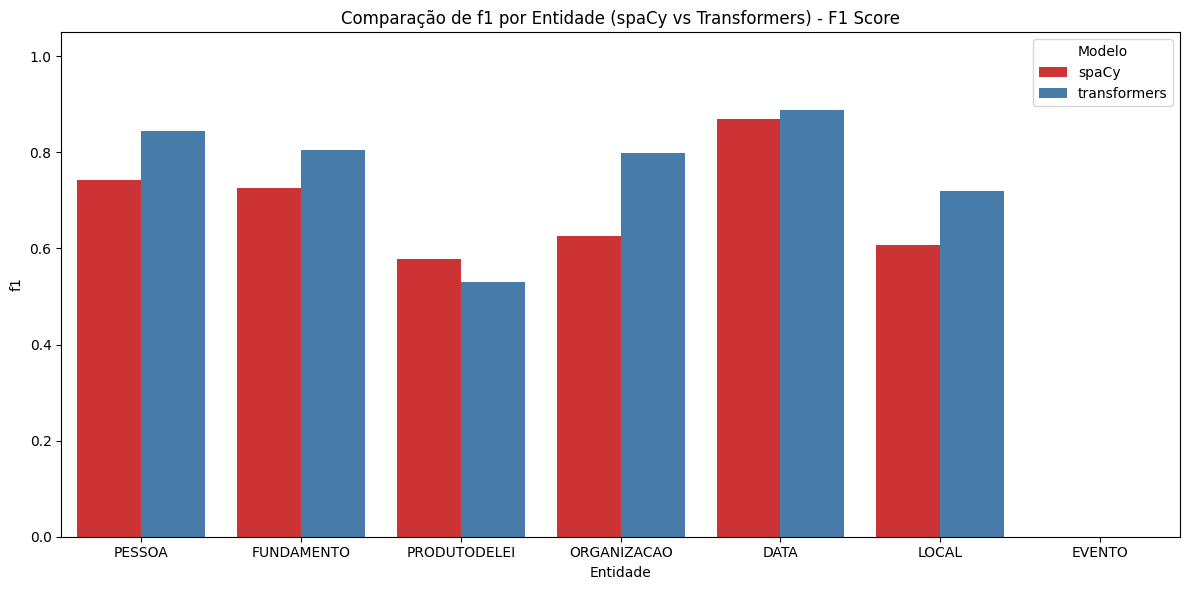

In [136]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='entity', y='f1', hue='model', palette='Set1')

plt.title("Comparação de f1 por Entidade (spaCy vs Transformers) - F1 Score")
plt.ylabel("f1")
plt.xlabel("Entidade")
plt.ylim(0, 1.05)
plt.legend(title="Modelo")
plt.tight_layout()
plt.show()

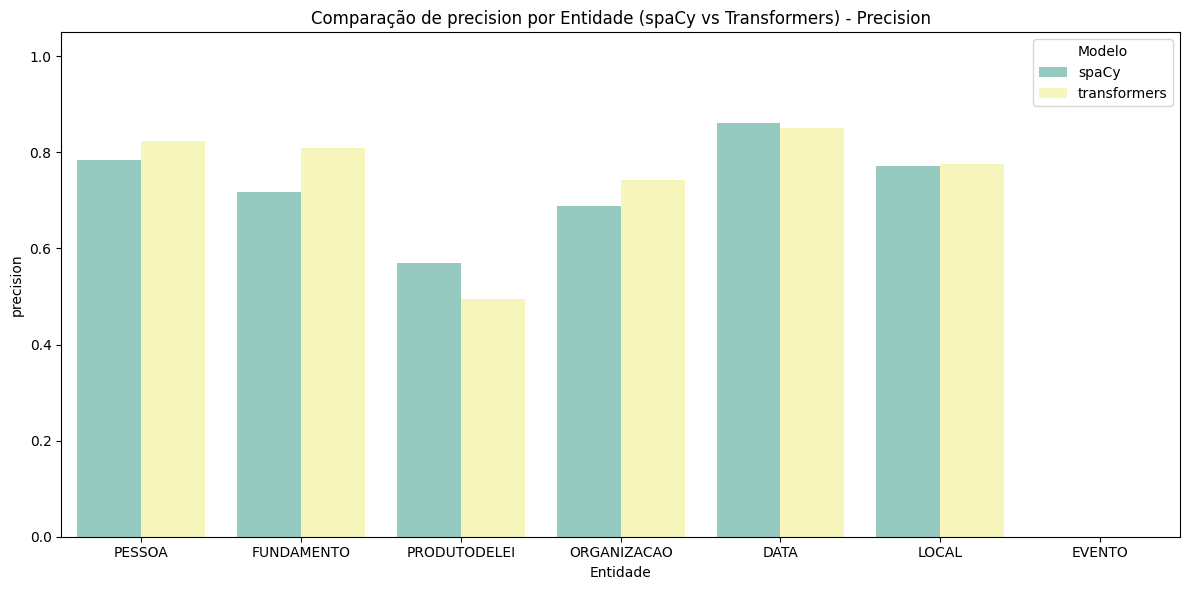

In [135]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='entity', y='precision', hue='model', palette='Set3')

plt.title("Comparação de precision por Entidade (spaCy vs Transformers) - Precision")
plt.ylabel("precision")
plt.xlabel("Entidade")
plt.ylim(0, 1.05)
plt.legend(title="Modelo")
plt.tight_layout()
plt.show()

#### Obervações finais


O modelo com o Spacy teve o treinamento mais lento (42 minutos), e um desempenho geral pior. Já o que usa transformers teve o tempo de treino
bem mais rapido 26 vezes mais rapido, e as métricas foram melhores. Por isso que usando transformers é o melhor jeito para essa tarefa de NER.